In [6]:
! pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.3 MB/s eta 0:00:001.3 MB/s eta 0:00:01


In [7]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load spreadsheet
xl = pd.ExcelFile('assessment.xlsx')

# Load a sheet into a DataFrame by name
df = xl.parse('Data')
df.head()

C_ID  C_AGE     C_EDU                  C_HSE       PC  INCM_TYP  \
0  1443     65   Masters  EXECUTIVE CONDOMINIUM  19250.0       6.0   
1  1559     86  O-Levels    PRIVATE CONDOMINIUM  99018.0       2.0   
2  1913     69  A-Levels                    NaN  10155.0       3.0   
3  2032     70       NaN                    NaN  21863.0       2.0   
4  2048     72  O-Levels  EXECUTIVE CONDOMINIUM  10641.0       NaN   

        gn_occ  NUM_PRD  CASATD_CNT   MTHCASA  ...     MAXUT  N_FUNDS  \
0         PMEB        3         8.0   6896.91  ...       NaN      NaN   
1         PMEB        4        13.0  51714.78  ...       NaN      NaN   
2         PMEB        4         1.0   5420.09  ...  59600.88      1.0   
3      RETIREE        3         1.0  13596.65  ...  33902.58      1.0   
4  BLUE COLLAR        4         2.0  51639.18  ...  15619.29      1.0   

       CC_AVE  MAX_MTH_TRN_AMT  MIN_MTH_TRN_AMT  AVG_TRN_AMT  ANN_TRN_AMT  \
0   13.233333              NaN              NaN          NaN          NaN   
1  727.629167          8530.88           273.44  2296.713333     27560.56   
2  367.389167           523.35           122.13   283.580833      3402.97   
3         NaN              NaN              NaN          NaN          NaN   
4         NaN              NaN              NaN          NaN          NaN   

   ANN_N_TRX   CC_LMT     C_seg  
0        NaN  34500.0  AFFLUENT  
1       88.0   4000.0  AFFLUENT  
2       78.0   5000.0  AFFLUENT  
3        NaN      0.0  AFFLUENT  
4        NaN      0.0  AFFLUENT  

[5 rows x 30 columns]

In [5]:
# Display summary statistics
print("Summary Statistics:")
print(df.describe())


Summary Statistics:
               C_ID         C_AGE            PC      INCM_TYP       NUM_PRD  \
count  66083.000000  66083.000000  65597.000000  36617.000000  66083.000000   
mean   41321.249111     52.357429  43249.703264      3.791709      2.097983   
std    27485.202813     14.323447  25671.057340      1.717852      1.093081   
min        0.000000      2.000000      0.000000      1.000000      1.000000   
25%    17402.000000     42.000000  21636.000000      2.000000      1.000000   
50%    37643.000000     52.000000  41101.000000      4.000000      2.000000   
75%    62866.500000     63.000000  60776.000000      5.000000      3.000000   
max    99996.000000    122.000000  99953.000000      8.000000      9.000000   

         CASATD_CNT       MTHCASA       MAXCASA       MINCASA         DRvCR  \
count  40991.000000  3.904500e+04  3.904500e+04  3.904500e+04  2.970800e+04   
mean       1.727867  1.614598e+04  1.544520e+04  1.317587e+04  3.663201e+04   
std        1.411307  6.683559e+


Data Exploration:


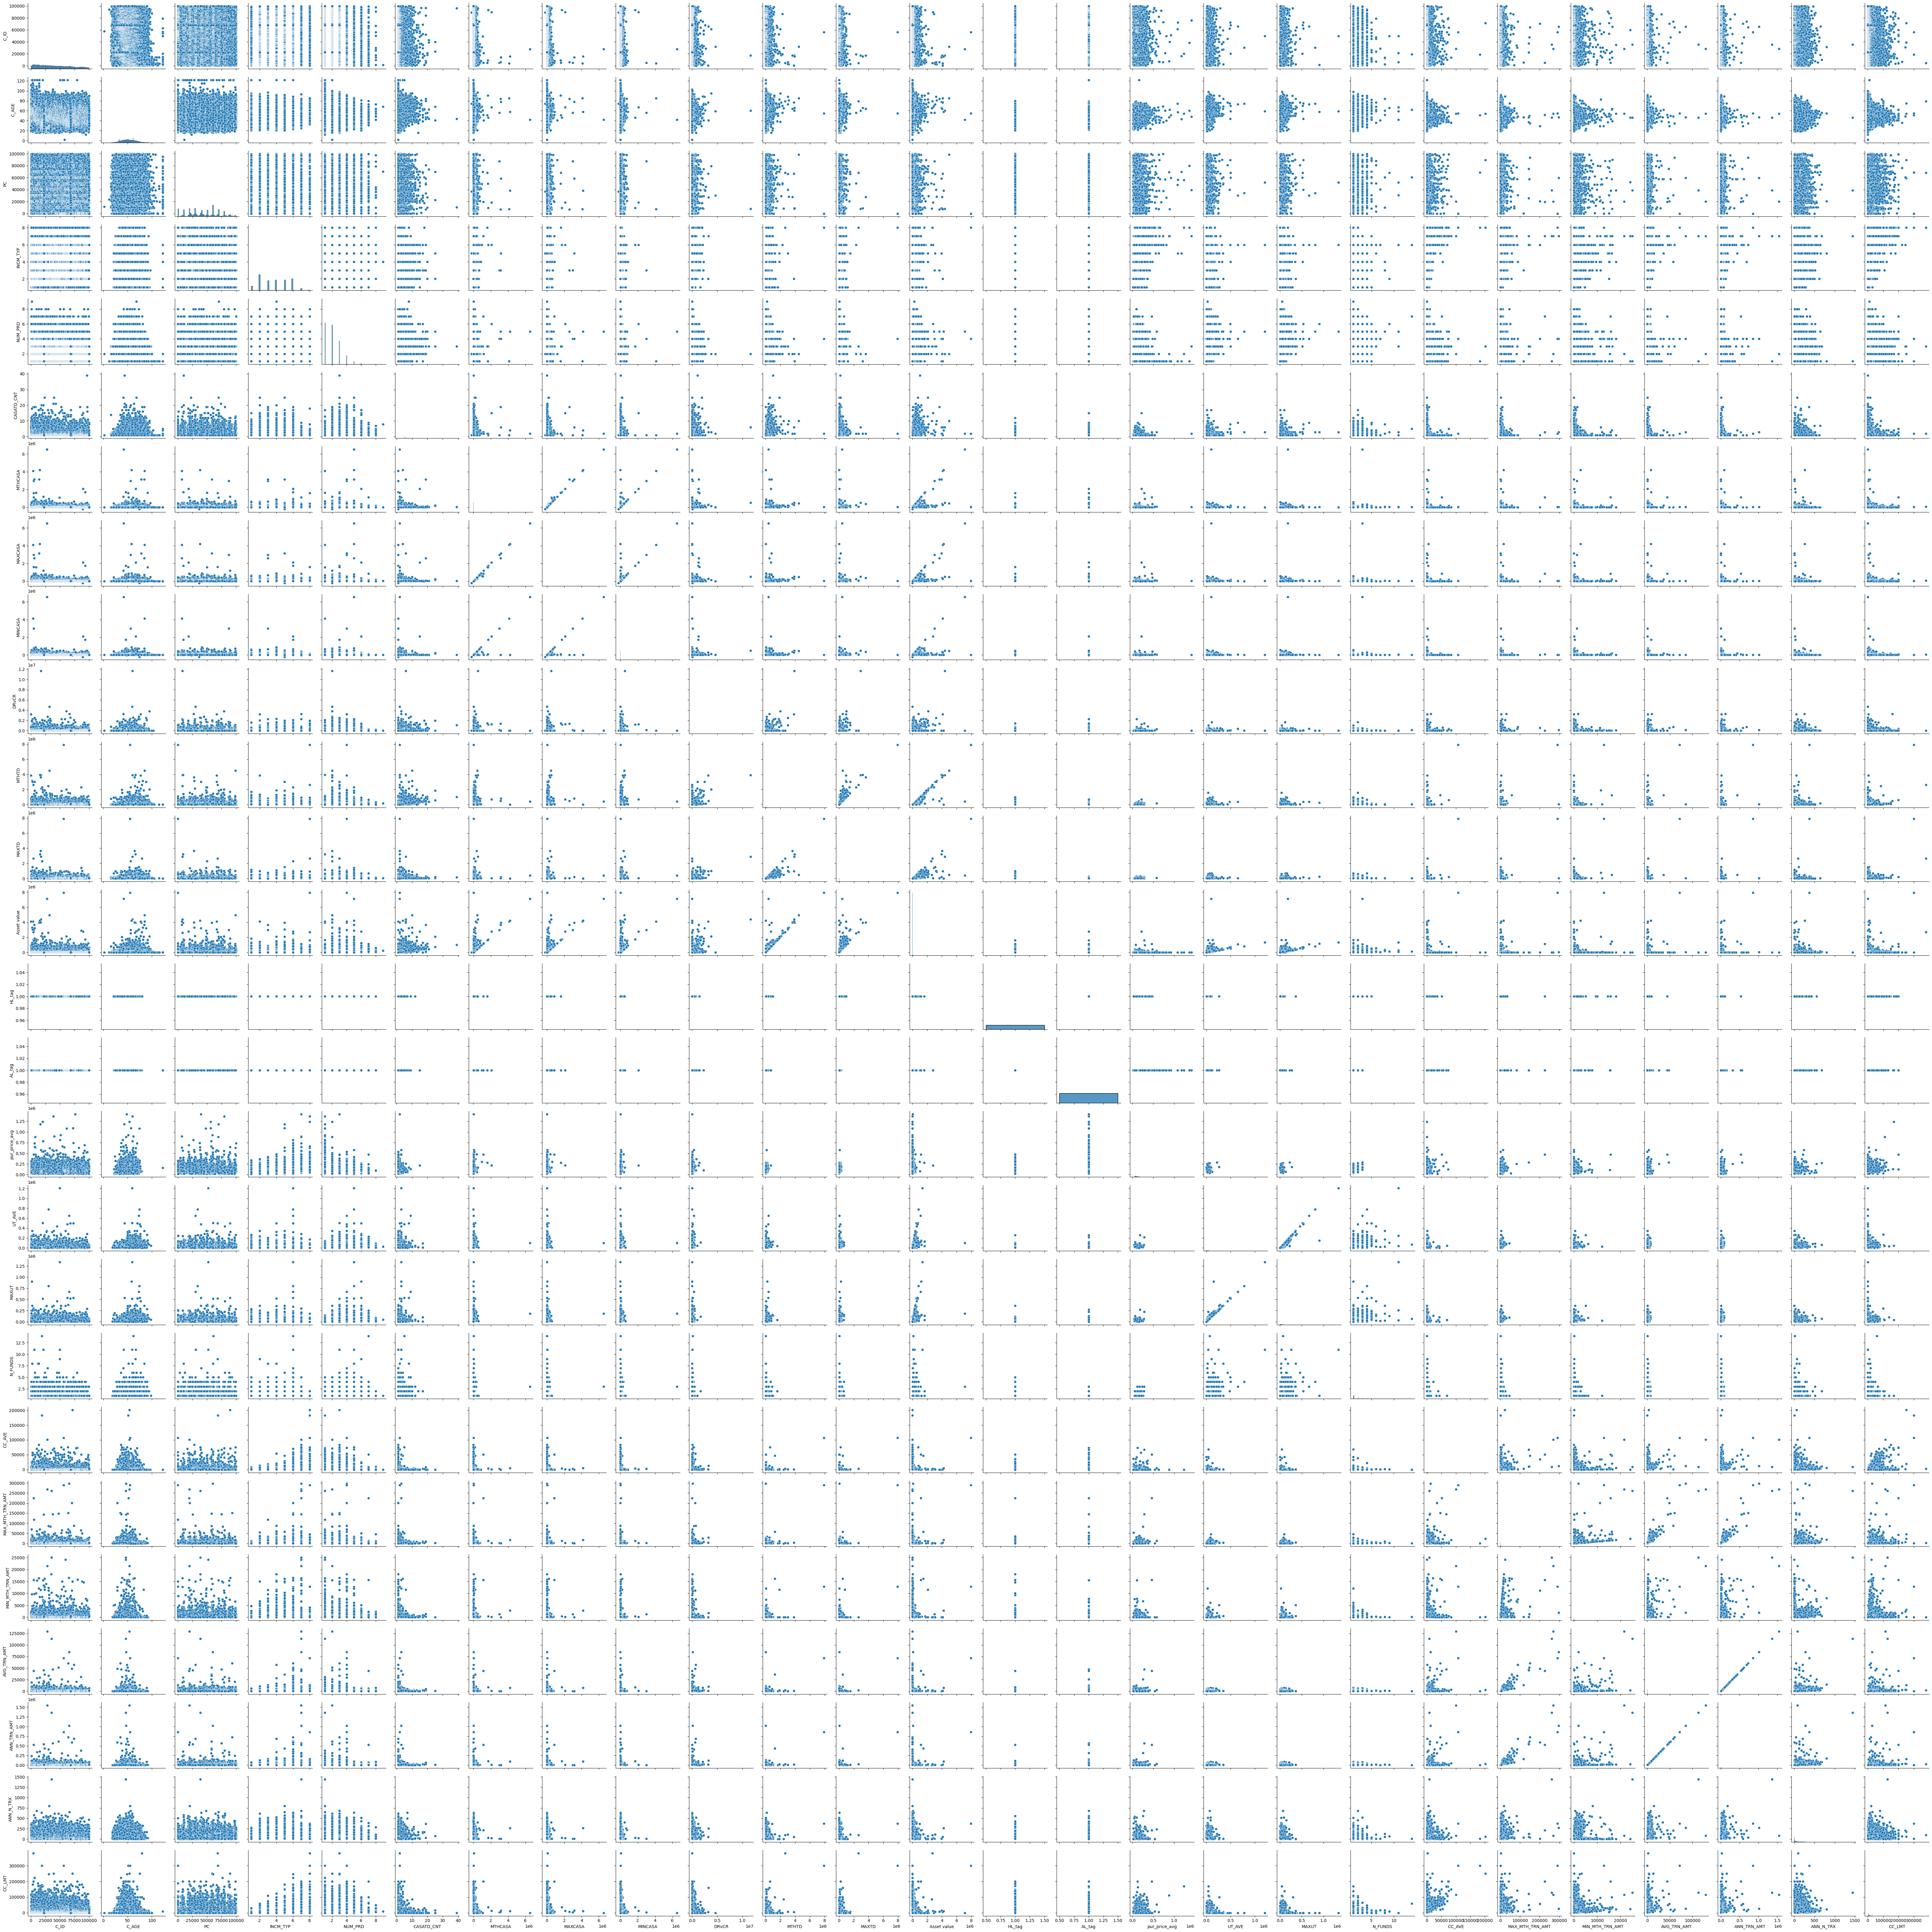

In [8]:
# Data Exploration
print("\nData Exploration:")
# Visualize distributions of numerical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df[numerical_features])
plt.show()

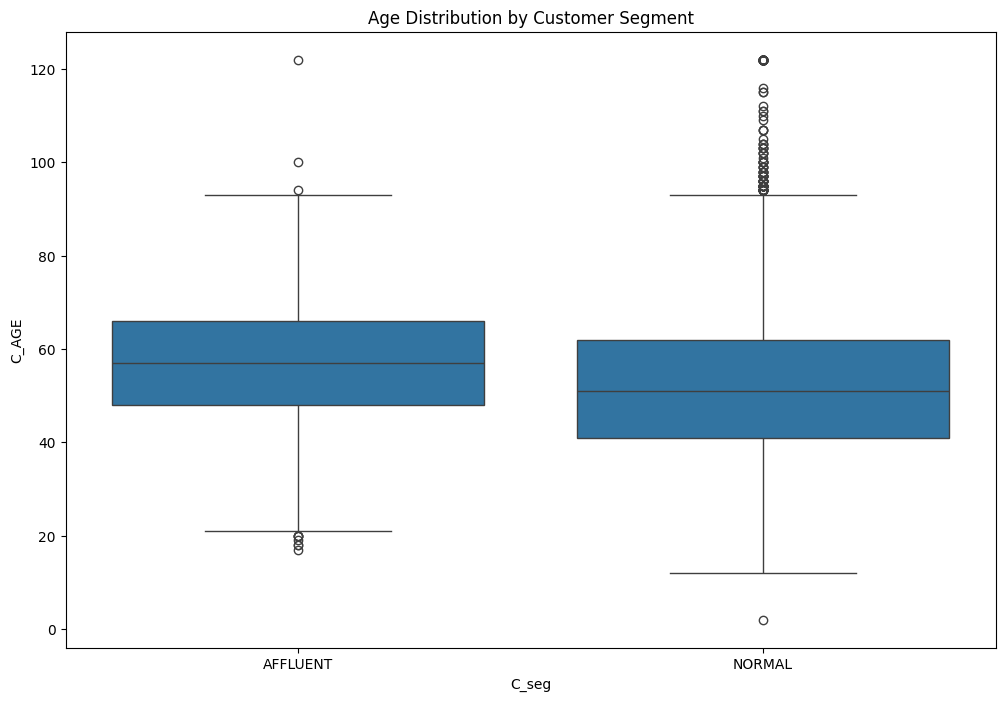

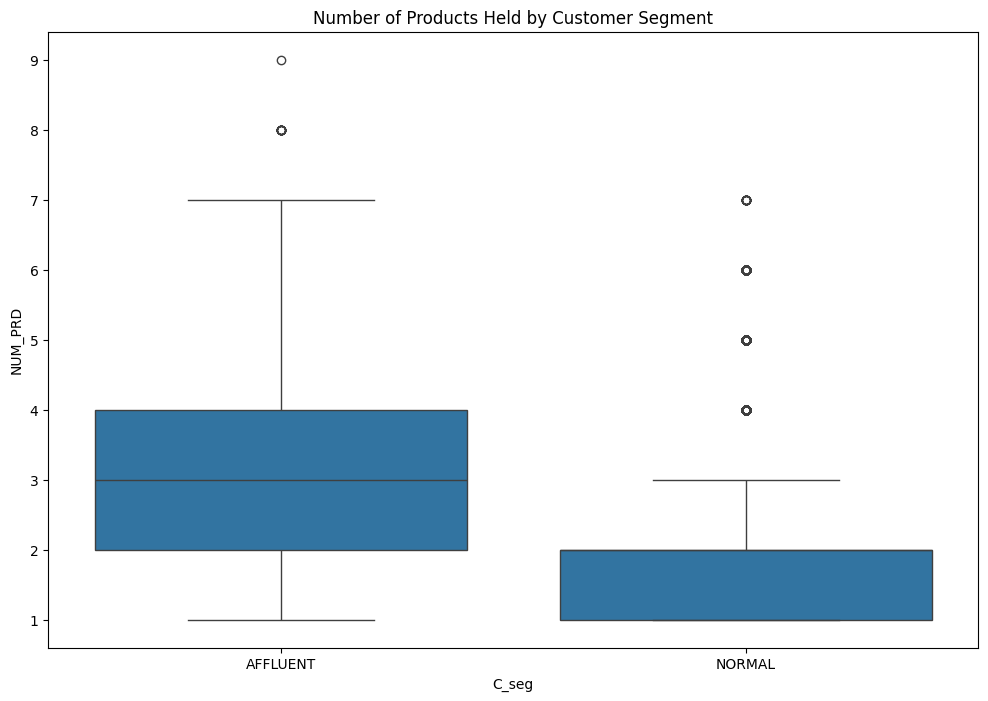

In [9]:
# Explore relationships between features and target variable
plt.figure(figsize=(12, 8))
sns.boxplot(x="C_seg", y="C_AGE", data=df)
plt.title("Age Distribution by Customer Segment")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x="C_seg", y="NUM_PRD", data=df)
plt.title("Number of Products Held by Customer Segment")
plt.show()

In [15]:
# Customer Segmentation Analysis
print("\nCustomer Segmentation Analysis:")
segment_distribution = df["C_seg"].value_counts(normalize=True)
print("Customer Segment Distribution:")
print(segment_distribution)

class_distribution = df["C_seg"].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Customer Segmentation Analysis:
Customer Segment Distribution:
C_seg
NORMAL      0.834662
AFFLUENT    0.165338
Name: proportion, dtype: float64

Class Distribution:
C_seg
NORMAL      55157
AFFLUENT    10926
Name: count, dtype: int64


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Univariate and Bivariate Analysis:


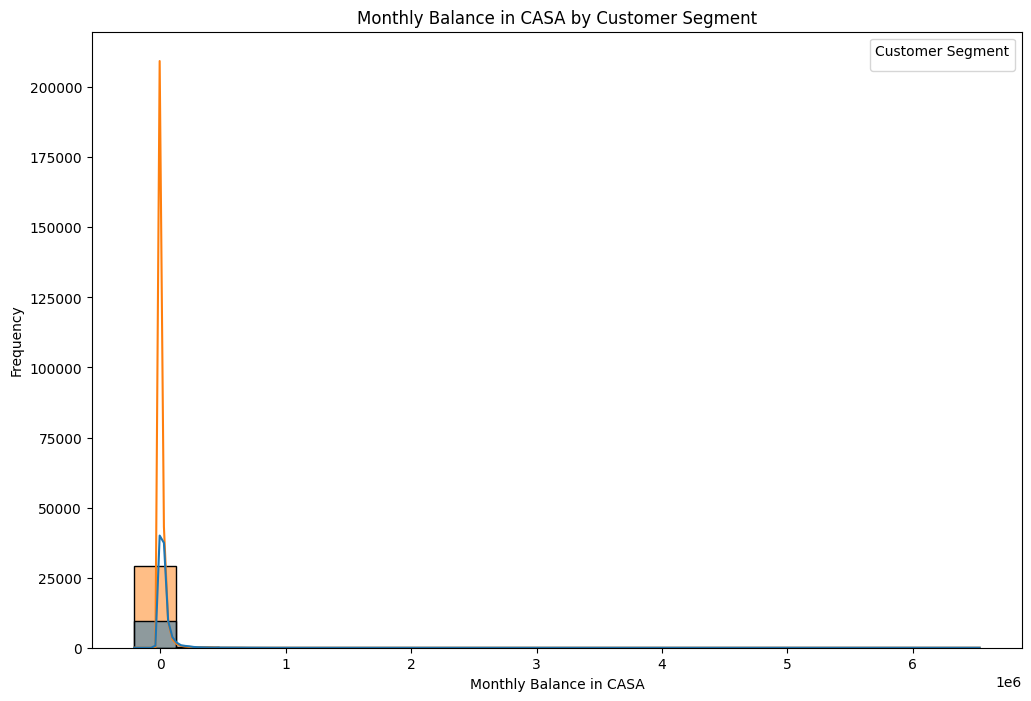

In [11]:
# Univariate and Bivariate Analysis
print("\nUnivariate and Bivariate Analysis:")
# Example: Distribution of CASA balance by customer segment
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x="MTHCASA", hue="C_seg", bins=20, kde=True)
plt.title("Monthly Balance in CASA by Customer Segment")
plt.xlabel("Monthly Balance in CASA")
plt.ylabel("Frequency")
plt.legend(title="Customer Segment")
plt.show()


Outlier Detection:


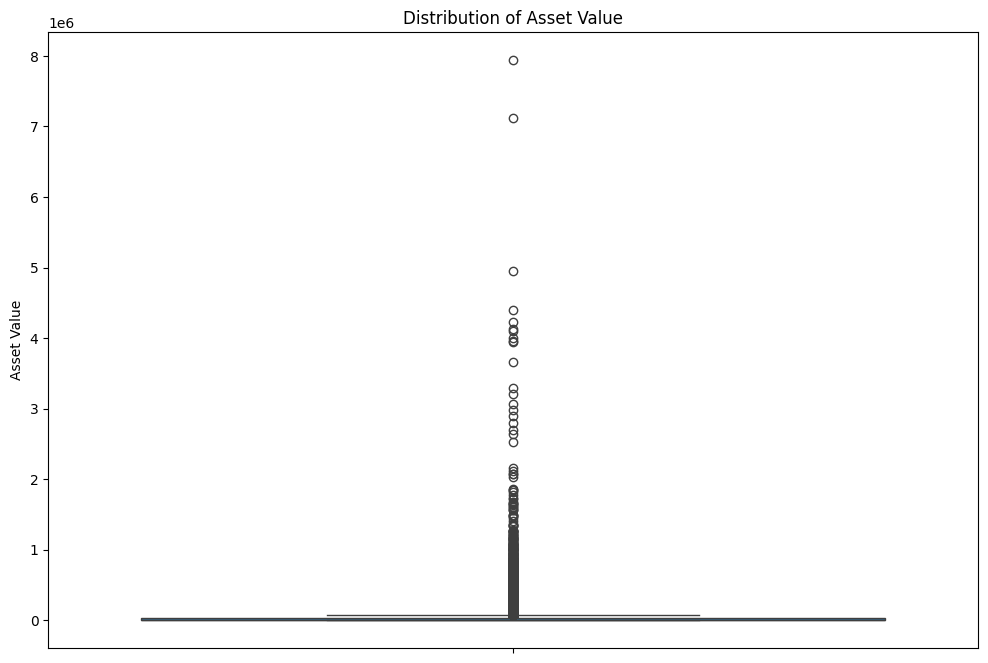

In [12]:
# Outlier Detection
print("\nOutlier Detection:")
# Example: Identify outliers in Asset value
plt.figure(figsize=(12, 8))
sns.boxplot(y="Asset value", data=df)
plt.title("Distribution of Asset Value")
plt.ylabel("Asset Value")
plt.show()


Correlation Analysis:


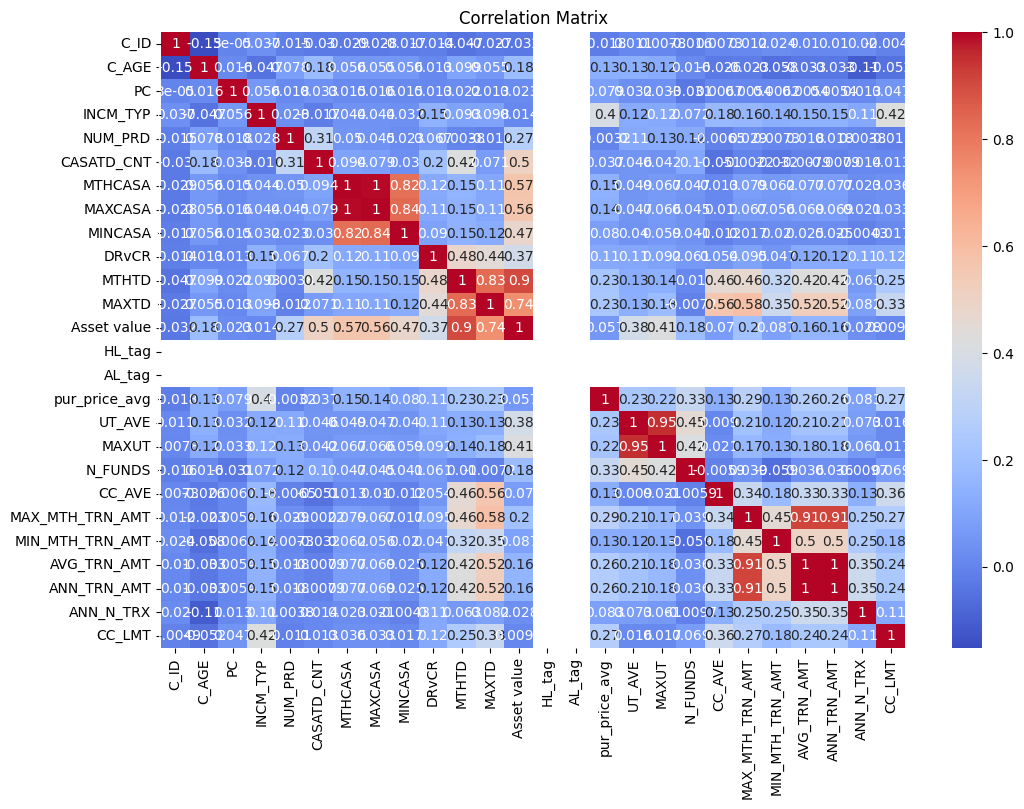

In [18]:
# Correlation Analysis
print("\nCorrelation Analysis:")
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()